In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from scipy.stats import entropy
from sklearn import tree


from google.colab import drive
drive.mount('/content/drive')
mydata_path = '/content/drive/MyDrive/Teaching/ML_Finance/Python/Data/'

Mounted at /content/drive


# 새 섹션

In [2]:
train = pd.read_excel(mydata_path +'lendingclub_traindata.xlsx')
validation=pd.read_excel(mydata_path +'lendingclub_valdata.xlsx')
test = pd.read_excel(mydata_path +'lendingclub_testdata.xlsx')

In [6]:
train.head()

,home_ownership,income,dti,fico,loan_status
0,1,44304.0,18.47,690,0
1,0,50000.0,29.62,735,1
2,0,64400.0,16.68,675,1
3,0,38500.0,33.73,660,0
4,1,118000.0,26.66,665,1


In [8]:
a1 = train['home_ownership'].mean()


In [ ]:
summ_lending = train.groupby('loan_status').agg(['mean', 'std']).T
summ_lending
#train.describe()

loan_status                     0             1
home_ownership mean      0.530178      0.623421
               std       0.499260      0.484572
income         mean  68419.787318  76130.465509
               std   49088.328816  55520.450581
dti            mean     20.410432     17.363271
               std       9.113078      8.720405
fico           mean    686.731824    697.383616
               std      24.264785     32.847925

In [9]:
train.groupby('home_ownership').agg(['mean']).T

,home_ownership,0,1
income,mean,62577.221299,82357.387020
dti,mean,18.117702,17.919439
fico,mean,690.431097,698.268685
loan_status,mean,0.752886,0.817171


In [10]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status',axis=1)
X_val=validation.drop('loan_status',axis=1)
X_test=test.drop('loan_status',axis=1)

# store target column
y_train = train['loan_status']
y_val=validation['loan_status']
y_test=test['loan_status']


print(X_train.shape, y_train.shape, X_val.shape,y_val.shape,X_test.shape,y_test.shape)

(7000, 4) (7000,) (3000, 4) (3000,) (2290, 4) (2290,)


In [11]:
X_train.head()

,home_ownership,income,dti,fico
0,1,44304.0,18.47,690
1,0,50000.0,29.62,735
2,0,64400.0,16.68,675
3,0,38500.0,33.73,660
4,1,118000.0,26.66,665


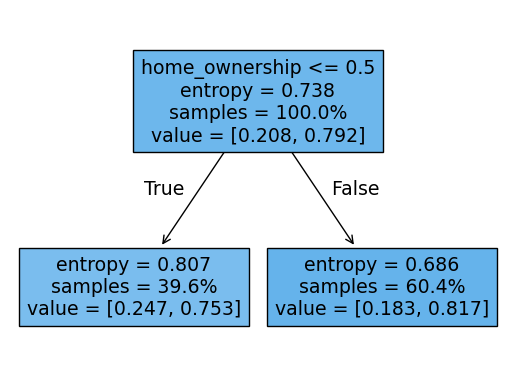

In [14]:
X1 = pd.DataFrame(X_train['home_ownership'])


t1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
t1 = t1.fit(X1,y_train)

plot_tree(t1, filled=True, feature_names=X1.columns, proportion=True)
plt.show()

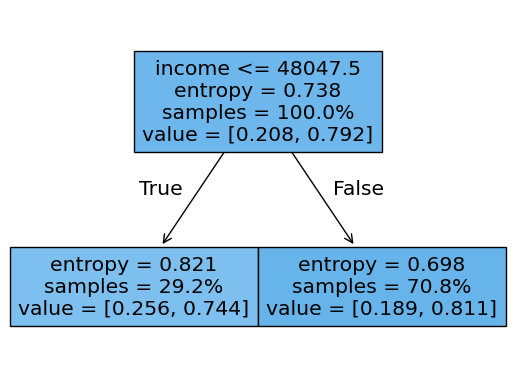

In [15]:
X2 = pd.DataFrame(X_train['income'])

t2 = DecisionTreeClassifier(criterion='entropy',max_depth=1)
t2 = t2.fit(X2,y_train)

plot_tree(t2, filled=True, feature_names=X2.columns, proportion=True)

plt.show()

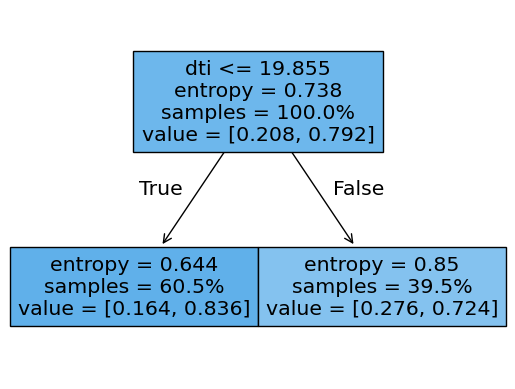

In [18]:
X3 = pd.DataFrame(X_train['dti'])

t3 = DecisionTreeClassifier(criterion='entropy',max_depth=1)
t3 = t3.fit(X3,y_train)

plot_tree(t3, filled=True, feature_names=X3.columns, proportion=True)

plt.show()

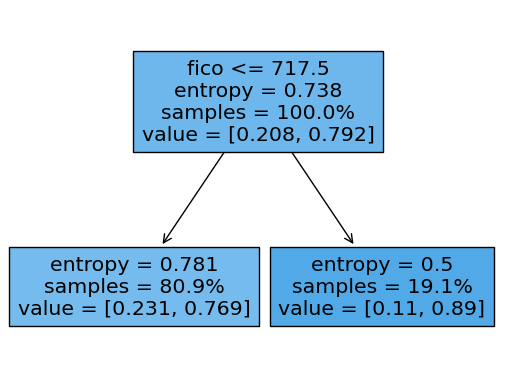

In [ ]:
X4 = pd.DataFrame(X_train['fico'])

t4 = DecisionTreeClassifier(criterion='entropy',max_depth=1)
t4 = t4.fit(X4,y_train)

plot_tree(t4, filled=True, feature_names=X4.columns, proportion=True)

plt.show()

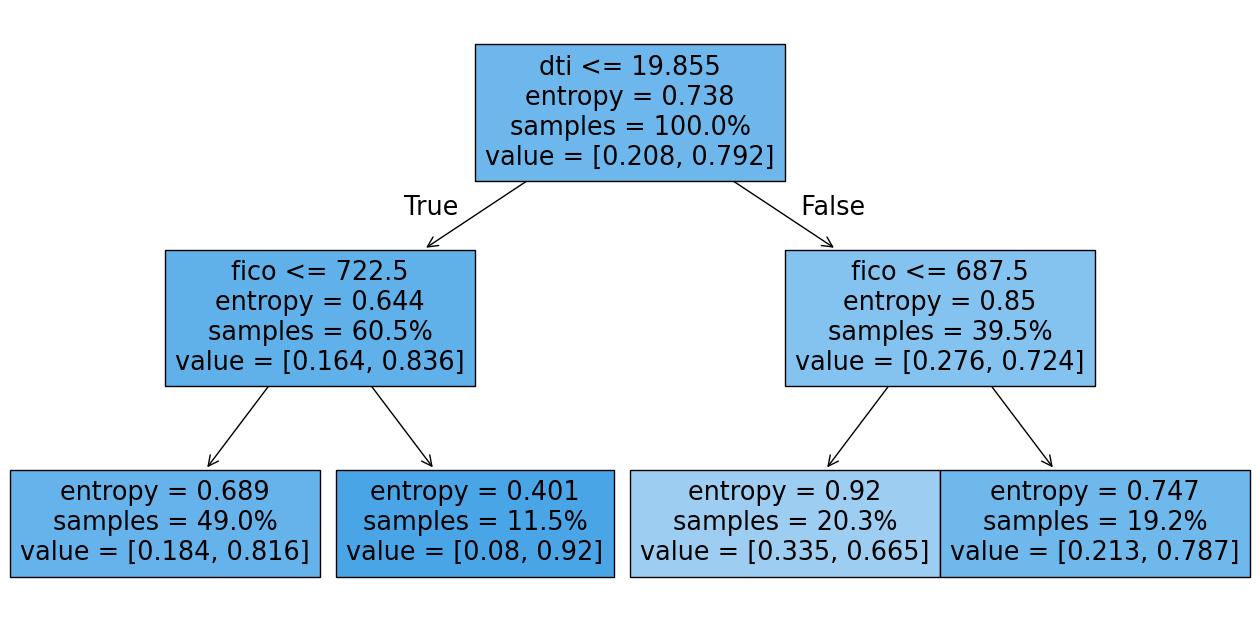

In [19]:
X2_1 = pd.DataFrame(X_train[['dti','fico']])

t2_1 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
t2_1 = t2_1.fit(X2_1,y_train)

plt.figure(figsize = (16,8))
plot_tree(t2_1, filled=True, feature_names=X2_1.columns, proportion=True)

plt.show()

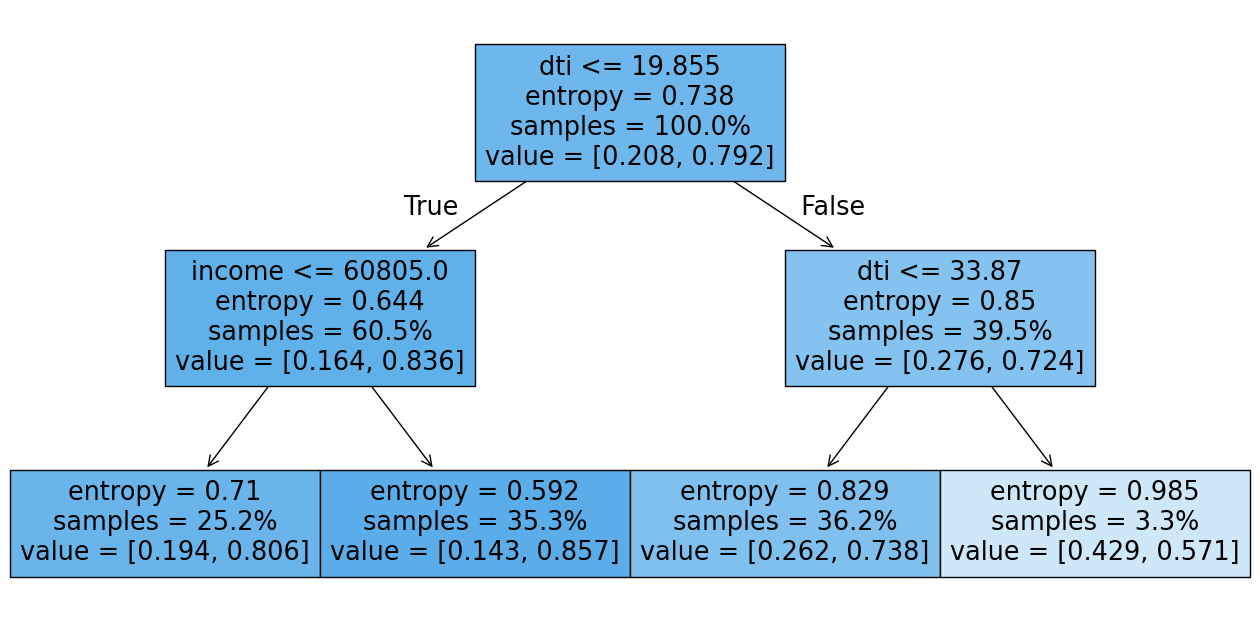

In [20]:
X2_1 = pd.DataFrame(X_train[['dti','income']])

t2_1 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
t2_1 = t2_1.fit(X2_1,y_train)

plt.figure(figsize = (16,8))
plot_tree(t2_1, filled=True, feature_names=X2_1.columns, proportion=True)

plt.show()

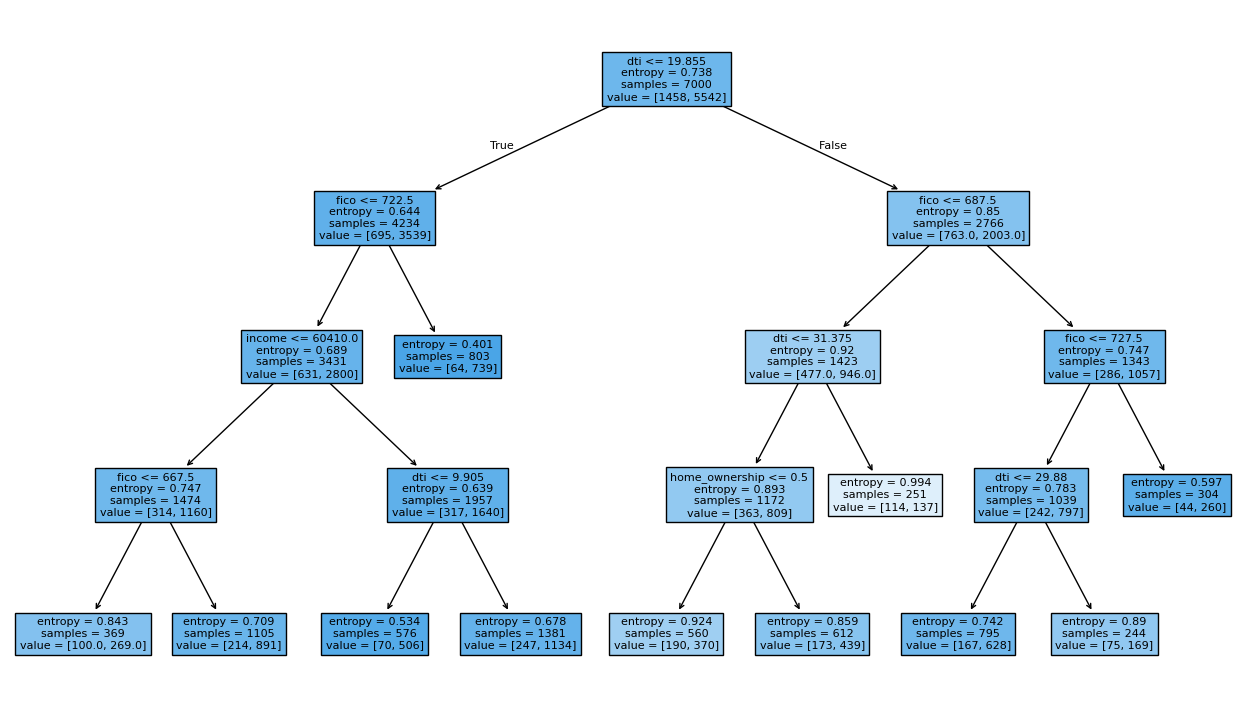

In [24]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=1000,min_samples_leaf=200,random_state=0)
clf = clf.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(16, 9))
plot_tree(clf, filled=True, feature_names=X_train.columns, proportion=False)

plt.show()


In [25]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

importances

,feature,importance
2,dti,0.518
3,fico,0.422
1,income,0.046
0,home_ownership,0.014


In [26]:
print(clf.tree_.n_node_samples)
print(clf.tree_.value[:,0,1])

print((clf.tree_.value[:,0,1])/(clf.tree_.n_node_samples))


[7000 4234 3431 1474  369 1105 1957  576 1381  803 2766 1423 1172  560
  612  251 1343 1039  795  244  304]
[0.79171429 0.83585262 0.8160886  0.78697422 0.72899729 0.80633484
 0.83801737 0.87847222 0.8211441  0.92029888 0.7241504  0.66479269
 0.69027304 0.66071429 0.71732026 0.54581673 0.78704393 0.76708373
 0.78993711 0.69262295 0.85526316]
[0.0001131  0.00019741 0.00023786 0.0005339  0.0019756  0.00072971
 0.00042822 0.00152513 0.0005946  0.00114608 0.0002618  0.00046718
 0.00058897 0.00117985 0.00117209 0.00217457 0.00058603 0.00073829
 0.00099363 0.00283862 0.00281337]


In [27]:
y_train_pred = clf.predict_proba(X_train)
y_val_pred=clf.predict_proba(X_val)
y_test_pred=clf.predict_proba(X_test)

print (y_train_pred)

# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val=np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test=np.negative(np.sum(mle_vector_test)/len(y_test))

print (y_train_pred)


print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)

[[0.19366516 0.80633484]
 [0.14473684 0.85526316]
 [0.1788559  0.8211441 ]
 ...
 [0.1788559  0.8211441 ]
 [0.30737705 0.69262295]
 [0.19366516 0.80633484]]
[[0.19366516 0.80633484]
 [0.14473684 0.85526316]
 [0.1788559  0.8211441 ]
 ...
 [0.1788559  0.8211441 ]
 [0.30737705 0.69262295]
 [0.19366516 0.80633484]]
cost function training set = 0.48922987922041394
cost function validation set = 0.49018506276665114
cost function test set = 0.490179969222669


In [ ]:
pred1 = np.where(clf.predict_proba(X_test)[:,1] > 0.75, 1, 0)
cm1 = (confusion_matrix(y_test, pred1, labels = [1,0], sample_weight = None)/len(y_test))*100
pred2 = np.where(clf.predict_proba(X_test)[:,1] > 0.80, 1, 0)
cm2 = (confusion_matrix(y_test, pred2, labels = [1,0], sample_weight = None)/len(y_test))*100
pred3 = np.where(clf.predict_proba(X_test)[:,1] > 0.85, 1, 0)
cm3 = (confusion_matrix(y_test, pred3, labels = [1,0], sample_weight = None)/len(y_test))*100



cm11 = pd.DataFrame(cm1, columns = ['Predict No Default', 'Predict Default'], index = ['Outcome No Default', 'Outcome Default'])
cm11.index.name = 'Z= 0.75'
cm21 = pd.DataFrame(cm2, columns = ['Predict No Default', 'Predict Default'], index = ['Outcome No Default', 'Outcome Default'])
cm21.index.name = 'Z = 0.80'
cm31 = pd.DataFrame(cm3, columns = ['Predict No Default', 'Predict Default'], index = ['Outcome No Default', 'Outcome Default'])
cm31.index.name = 'Z = 0.85'

print(cm11)
print(cm21)
print(cm31)

                    Predict No Default  Predict Default
Z= 0.75                                                
Outcome No Default           60.524017        18.646288
Outcome Default              12.314410         8.515284
                    Predict No Default  Predict Default
Z = 0.80                                               
Outcome No Default           51.484716         27.68559
Outcome Default              10.131004         10.69869
                    Predict No Default  Predict Default
Z = 0.85                                               
Outcome No Default           22.401747        56.768559
Outcome Default               2.794760        18.034934


In [ ]:
THRESHOLD = [0, .75, .80, .85, 1]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
n_test = len(y_test)
Q = clf.predict_proba(X_test)[:,1]

j = 0

for i in THRESHOLD:
    preds = np.where(Q>i, 1, 0)
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None)/n_test)*100
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives

    results.iloc[j,1] = accuracy_score(y_test, preds)
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)

    j += 1

print('ALL METRICS')
print(results.T.to_string(header=False))

ALL METRICS
THRESHOLD            0.0      0.75       0.8      0.85       1.0
accuracy        0.791703  0.690393  0.621834  0.404367  0.208297
true pos rate        1.0  0.764479  0.650303  0.282956       0.0
true neg rate        0.0  0.408805  0.513627  0.865828       1.0
false pos rate       1.0  0.591195  0.486373  0.134172       0.0
precision       0.791703  0.830935  0.835578  0.889081       0.0
f-score         0.883744  0.796323   0.73139  0.429289       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


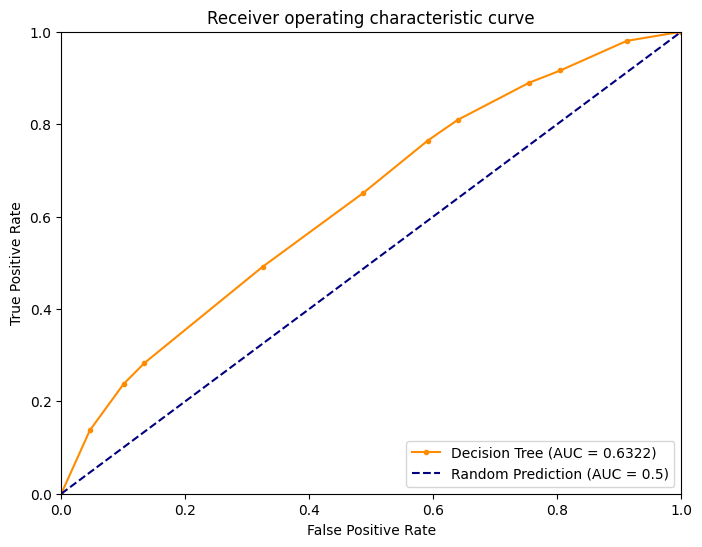

In [ ]:
# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, Q)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))      # format the plot size
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Decision Tree (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")

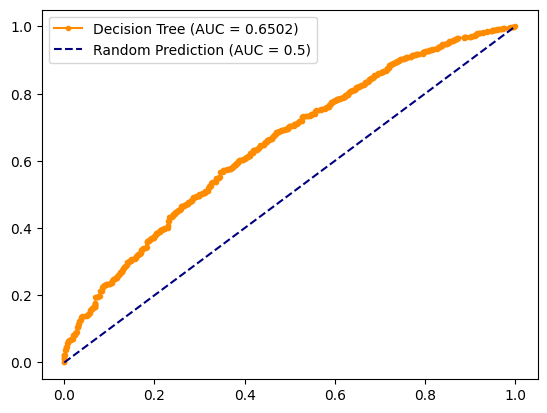

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 1000, criterion='entropy',max_depth=4,min_samples_split=1000,min_samples_leaf=200,random_state=0)
clf = clf.fit(X_train,y_train)

Q = clf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, Q)
roc_auc = auc(fpr,tpr)

lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Decision Tree (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.legend()

## IOWA House

In [ ]:
train = pd.read_excel(mydata_path +'IOWA_Training_Data.xlsx')

train.head()

,OverallQual,GrLivArea,Sale Price
0,7,1710,208.5
1,6,1262,181.5
2,7,1786,223.5
3,7,1717,140.0
4,8,2198,250.0


In [ ]:
# remove target column to create feature only dataset
X_train = train.drop('Sale Price',axis=1)
# store target column
y_train = train['Sale Price']
print(X_train.shape, y_train.shape)

(1800, 2) (1800,)


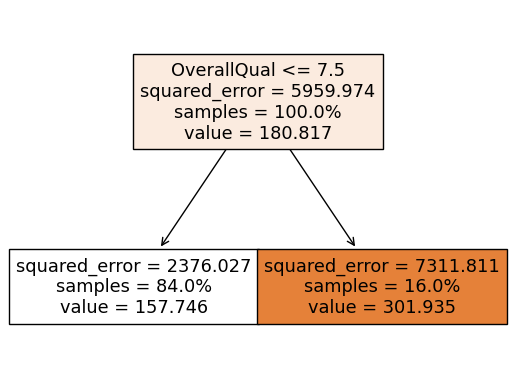

In [ ]:
Xa = pd.DataFrame(X_train['OverallQual'])
pred1 = DecisionTreeRegressor(criterion='squared_error',max_depth=1,random_state=0)
pred1 = pred1.fit(Xa,y_train)

plot_tree(pred1, filled=True, feature_names=Xa.columns, proportion=True)

plt.show()

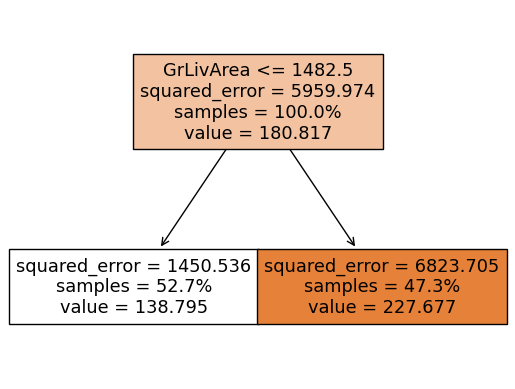

In [ ]:
Xb = pd.DataFrame(X_train['GrLivArea'])
pred2 = DecisionTreeRegressor(criterion='squared_error',max_depth=1,random_state=0)
pred2 = pred2.fit(Xb,y_train)

plot_tree(pred2, filled=True, feature_names=Xb.columns, proportion=True)


plt.show()

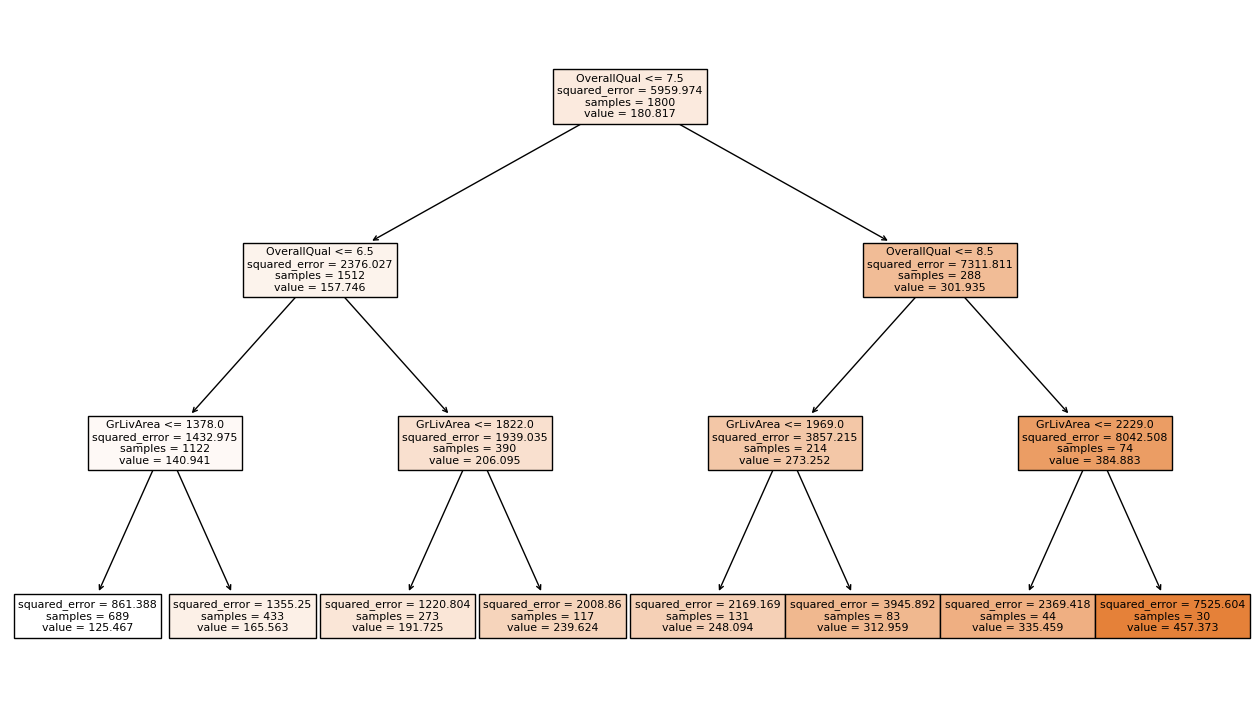

In [ ]:
pred = DecisionTreeRegressor(criterion='squared_error',max_depth=3,random_state=0)
pred = pred.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(16, 9))
plot_tree(pred, filled=True, feature_names=X_train.columns, proportion=False)


plt.show()

In [ ]:
train.mean()

OverallQual       6.100000
GrLivArea      1502.575000
Sale Price      180.816649
dtype: float64